# string model 3 literature

In [1]:
import boolean2_helper as bm
import network_drawer as draw
from model_builder_3 import string2definition, add_mtb2definition

In [2]:
mtb = ["Eis" , "esxA" ,"esxH_esxG" ,"IpdC" ,"ndkA" ,"PPE2" ,"PstS1" ,"PtpA" ,"Rv2779c" ,"SapM"]
hit = ['AP1B1','ARL10','ASPSCR1','CHMP2A','KIF6','CLVS2','CDC42EP3','CHMP2B','GGA1','GOLT1B','HIP1R','VPS26B','PKD1L2','RIMS2','VCP']
complexes = ['ESCRT_complexes', 'MHC_I_complexes', 'vATPase_complexes', 'ImportinBetaAlpha_complexes']
processes = ['Phagosome_maturation', 'Phagosome_acidification', 'Phagolysosome_assembly']
mtb = sorted(mtb)
hit = sorted(hit)
complexes = sorted(complexes)
processes # maturation at the top 
runs = 50

# model 3

FIG 1


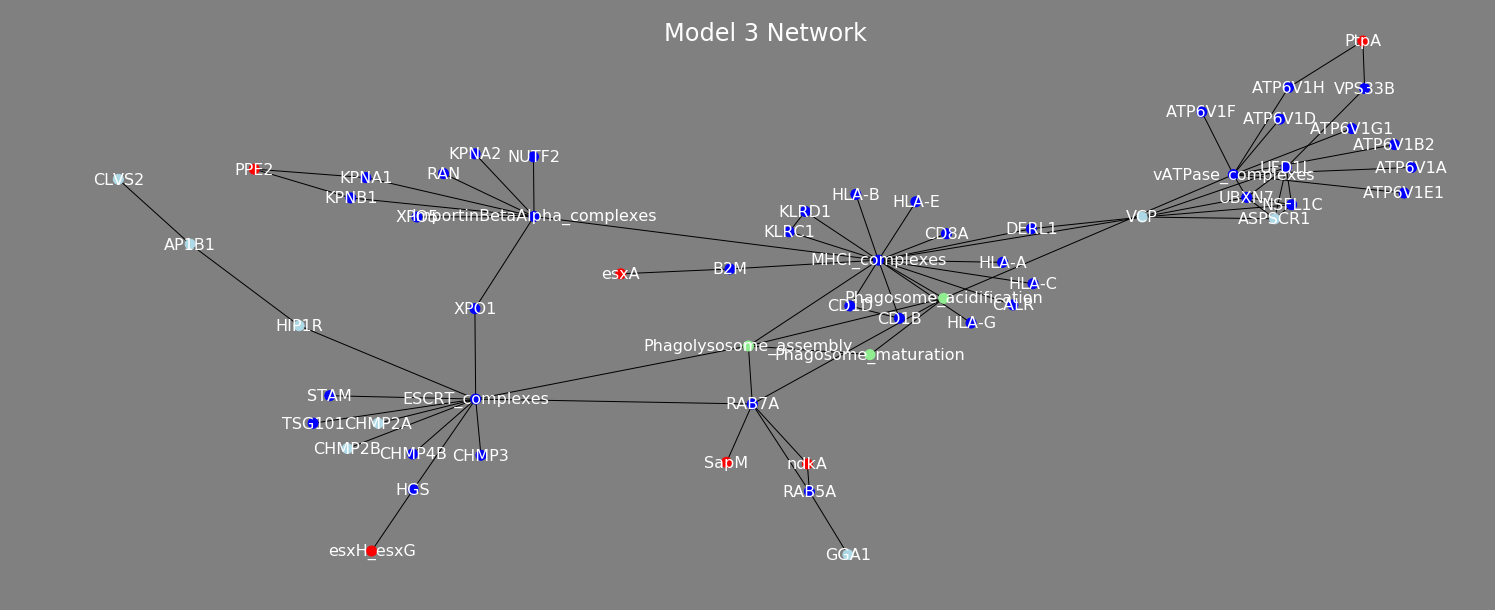

In [3]:
print "FIG 1"
draw.draw_edgelists('model2and3-edgelist-for-drawing.csv', # model 3 changes just at the process level
                    add_mtb='mtb-edgelist.csv', 
                    add_process='process-edgelist-3-for-drawing.csv',
                    highlight=hit,
                    title='Model 3 Network',
                    h=8
              )

In [4]:
definition = string2definition('model_3.txt')
hit = [factor for factor in hit if factor in definition]
# print definition

# Experiments & Figures

mtb ON

In [5]:
definition_mtbON = add_mtb2definition(definition, 'mtb-edgelist.csv', True)
mtb = [factor for factor in mtb if factor in definition_mtbON] # just factors modelled for drawing
mtb = sorted(mtb, key=lambda s: s.lower())
mtb

added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


['esxA', 'esxH_esxG', 'ndkA', 'PPE2', 'PtpA', 'SapM']

In [6]:
# run model
models_mtb = bm.run_model(definition_mtbON, steps=50, runs=runs)

FIG 2


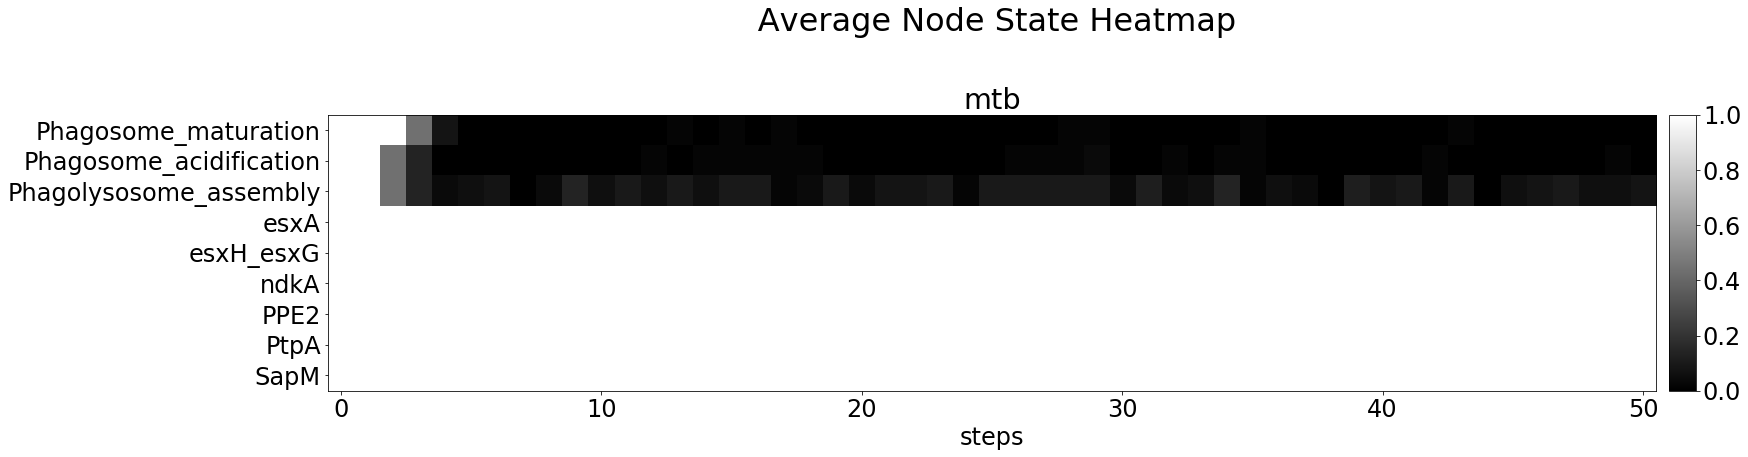

In [7]:
print "FIG 2"
# plot average
avg_mtb = bm.average_models(models_mtb)
bm.plot_maps([avg_mtb],
             titles=['mtb'], 
             nodes = processes + mtb,
             h = 6.5,
             w = 25,
             top = 0.75,
             bottom=0.16,
             left=.19,
             right = .95,
             fontsize = 24,
             suptitlesize = 32,
             suptitle=' '*22+'Average Node State Heatmap' # white space to centre
            )

In [8]:
# analyse behaviour
cycles = bm.get_cycles(models_mtb)
print bm.count_cycles(cycles)
print "index, state:", bm.average_cycles(cycles)


('none: 34', 'steady: 15', 'other: 1')
index, state: [7.52 0.34]


mtb ON other nodes 

In [9]:
other = [node for node in models_mtb[0].nodes if not node in processes + complexes + hit + mtb ]
other = sorted(other)

FIG 3


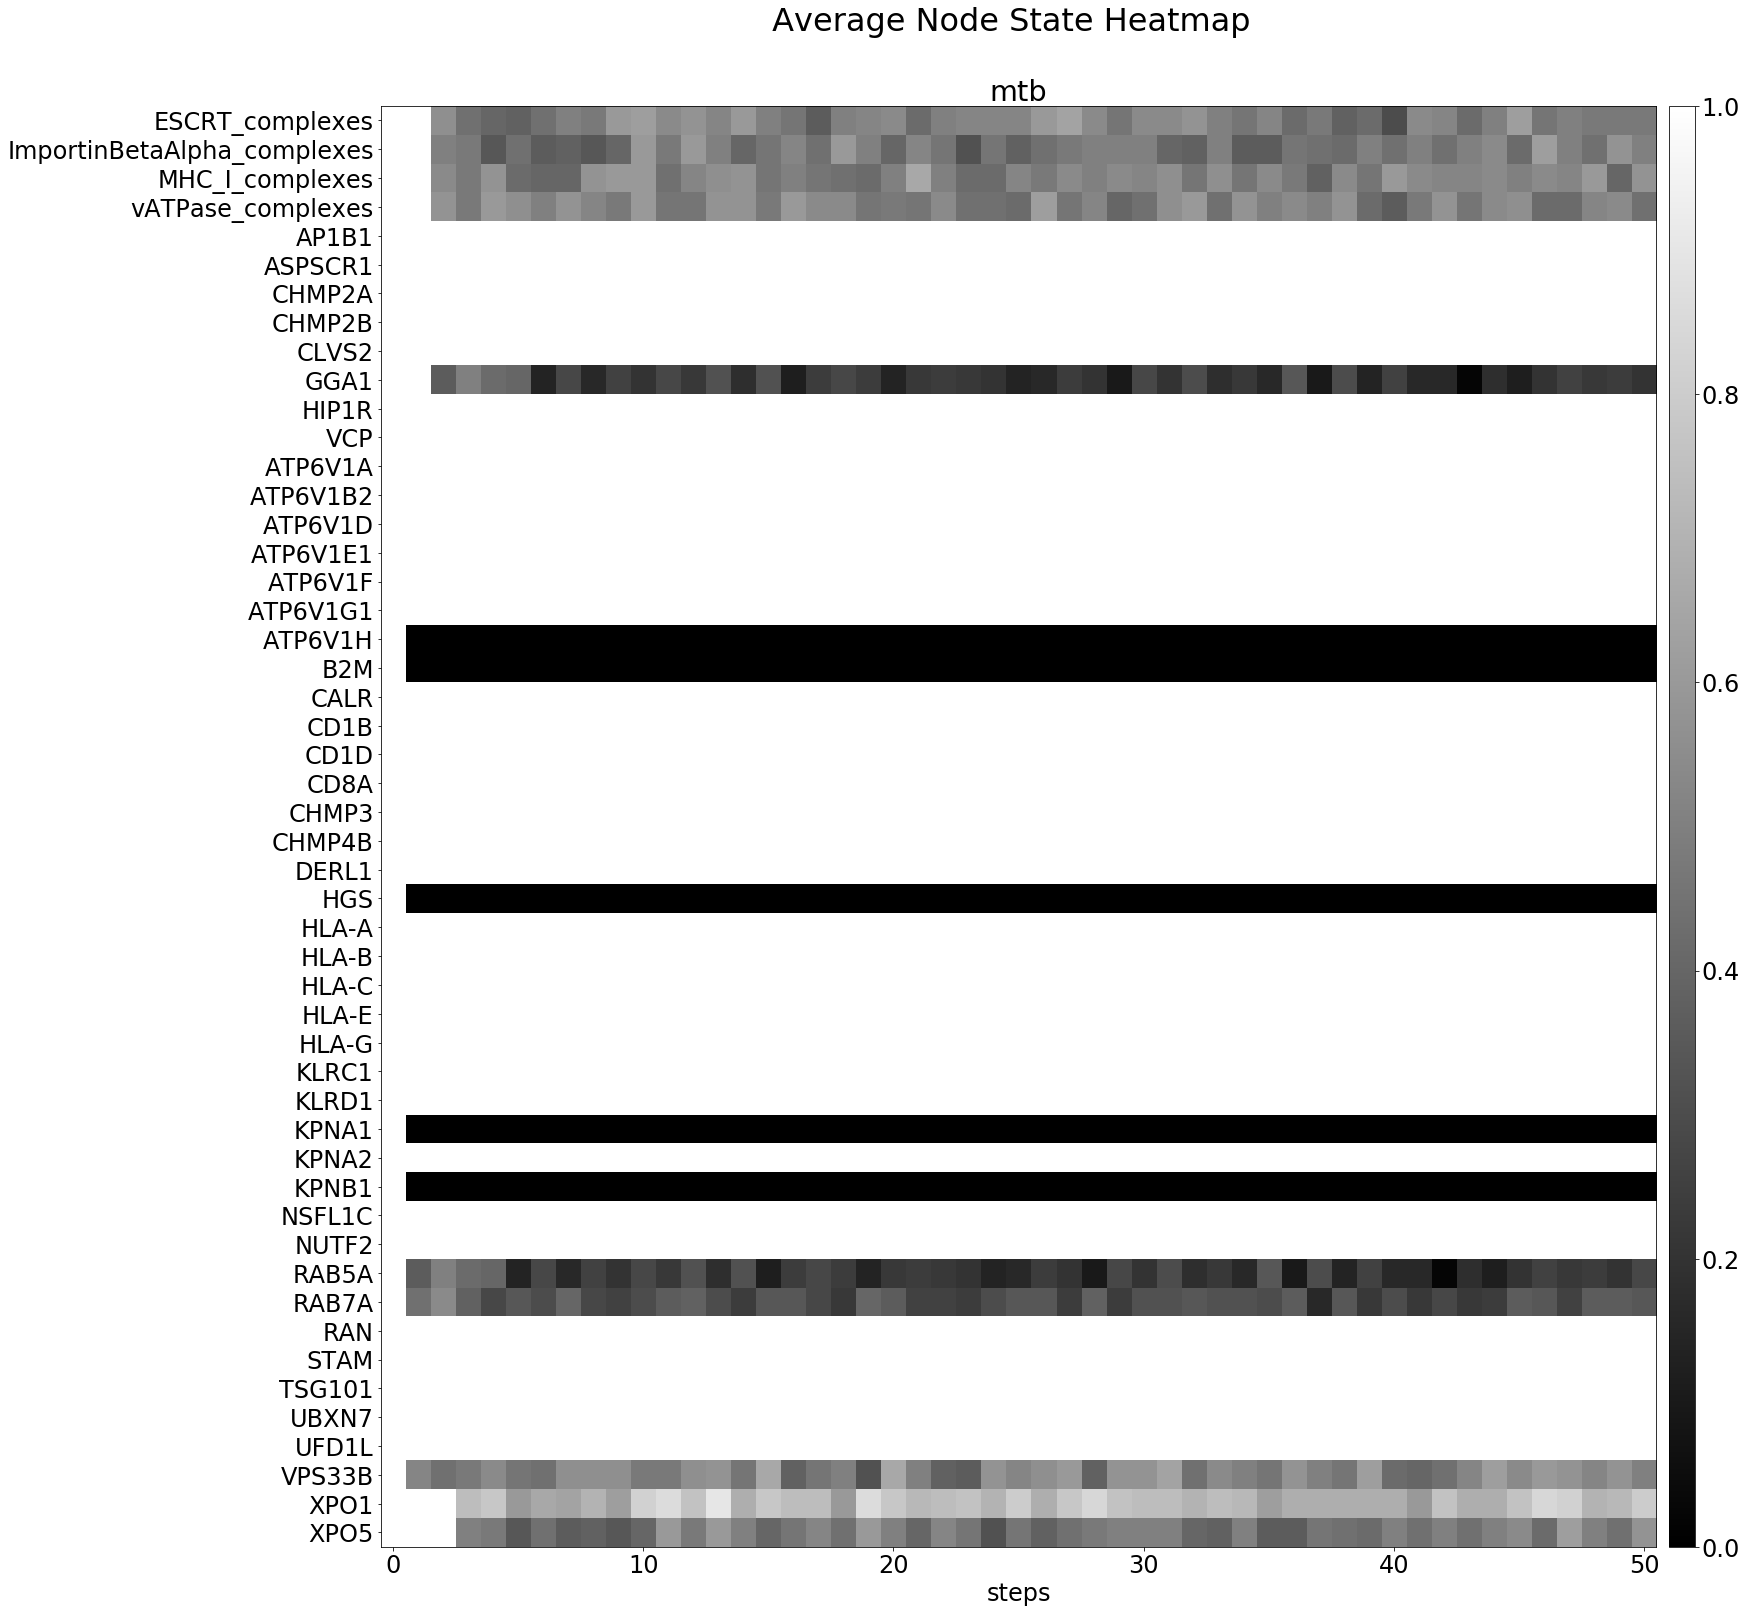

In [10]:
print "FIG 3"
# plot average
avg_mtb = bm.average_models(models_mtb)
bm.plot_maps([avg_mtb],
             titles=['mtb'], 
             nodes = complexes + hit + other,
             h = 23,
             w = 25,
             top = 0.92,
             bottom=0.05,
             left=.22,
             right = .95,
             fontsize = 24,
             suptitlesize = 32,
             suptitle=' '*25+'Average Node State Heatmap' # white space to centre
            )

mtb ON one at a time

In [11]:
definition_mtbOff = add_mtb2definition(definition, 'mtb-edgelist.csv', False)
avgs_mtbOneByOne = []
for factor in mtb:
    definition_loop = bm.switch(definition_mtbOff,on=[factor])
    models = bm.run_model(definition_loop, steps=50, runs=runs)
    avgs_mtbOneByOne.append(bm.average_models(models))

added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


FIG 4


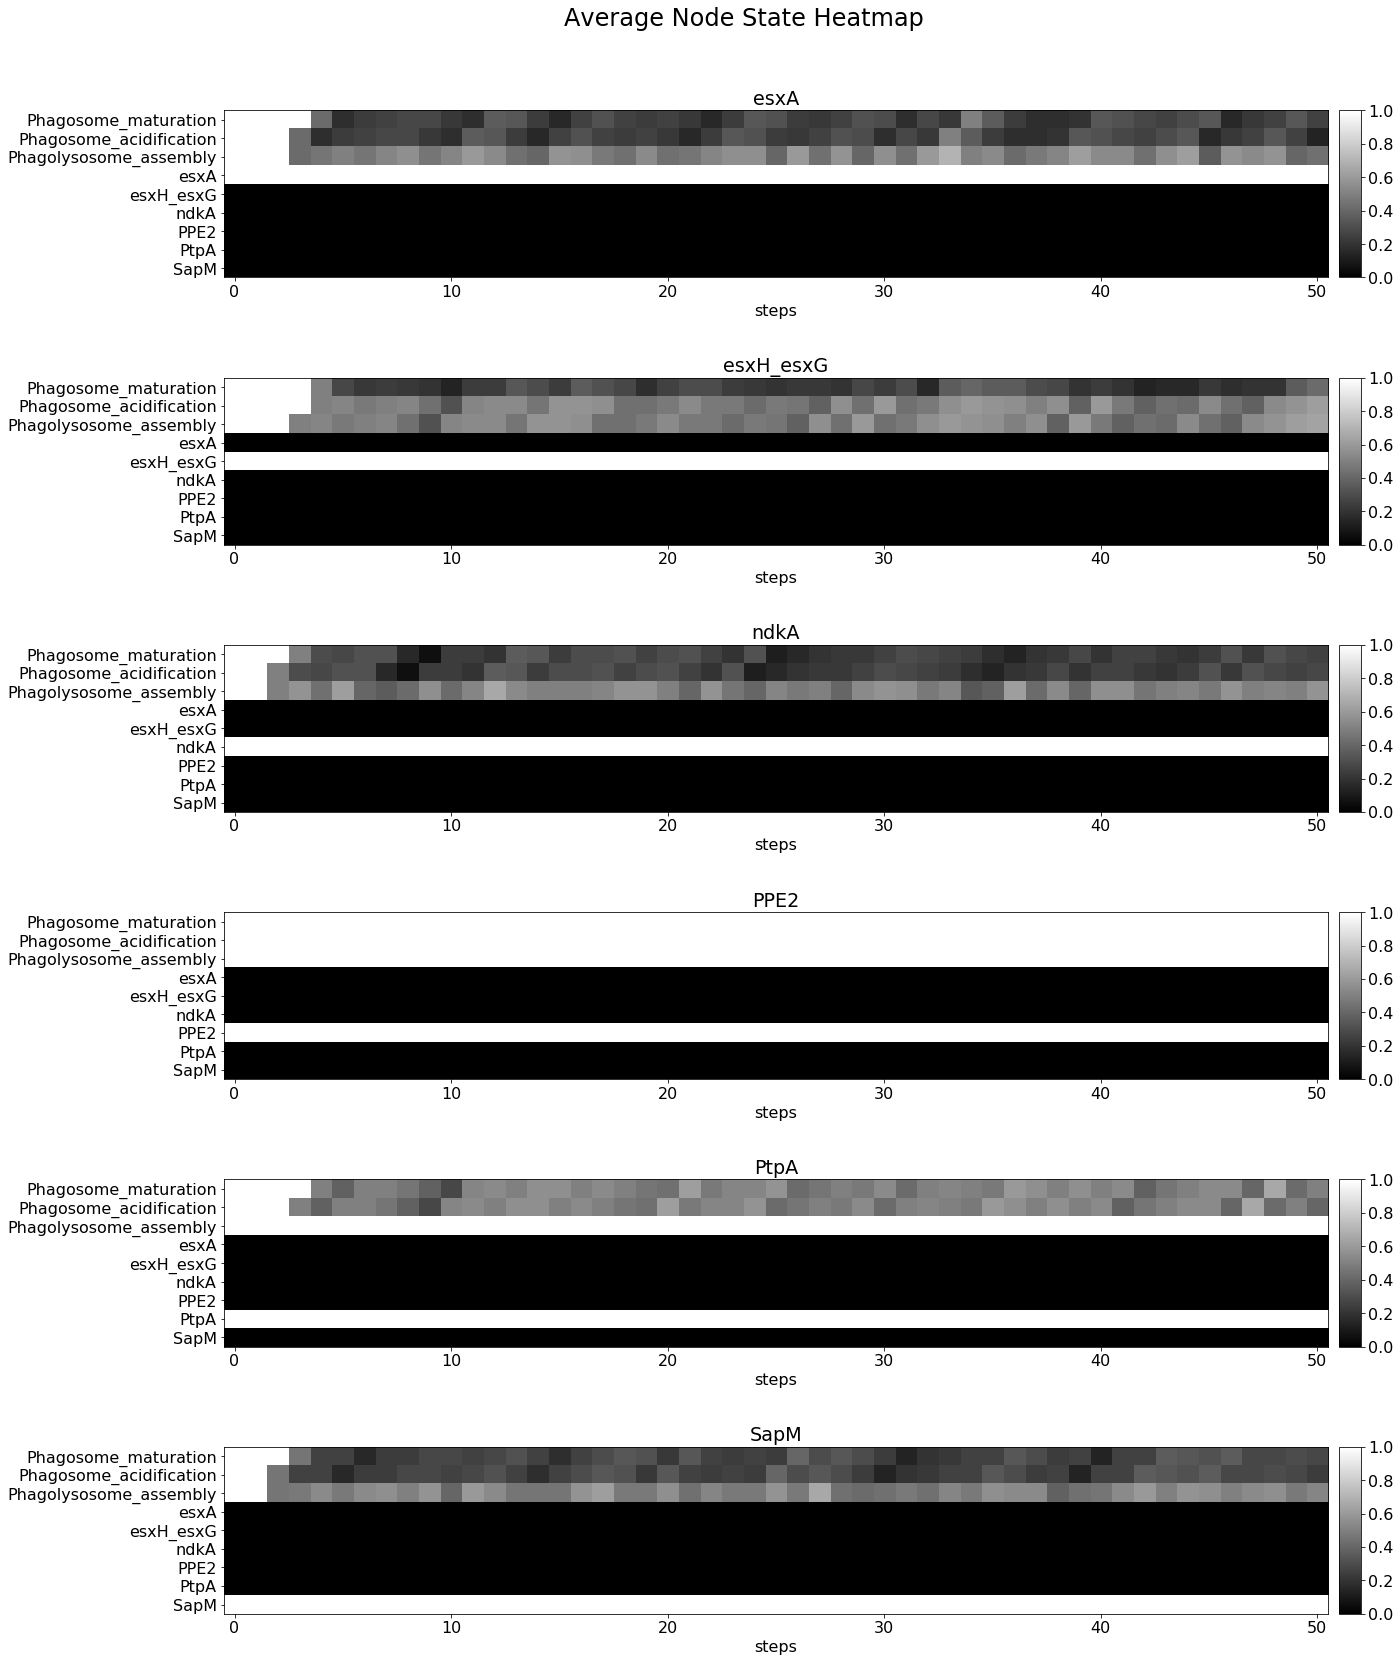

In [12]:
print "FIG 4"
bm.plot_maps(avgs_mtbOneByOne,
             titles=mtb, 
             nodes = processes + mtb,
             h = 4,
             top = 0.92,
             bottom=0.05,
             right=.95,
             left=.16,
             suptitle='        Average Node State Heatmap', # white space to centre
             hspace = 0.6
            )

knockouts

In [13]:
definition_knockouts = bm.knockout(definition, hit)
# print definition_knockouts

In [14]:
# runs
models_knockouts = bm.run_model(definition_knockouts, steps=50, runs=runs)

FIG 5


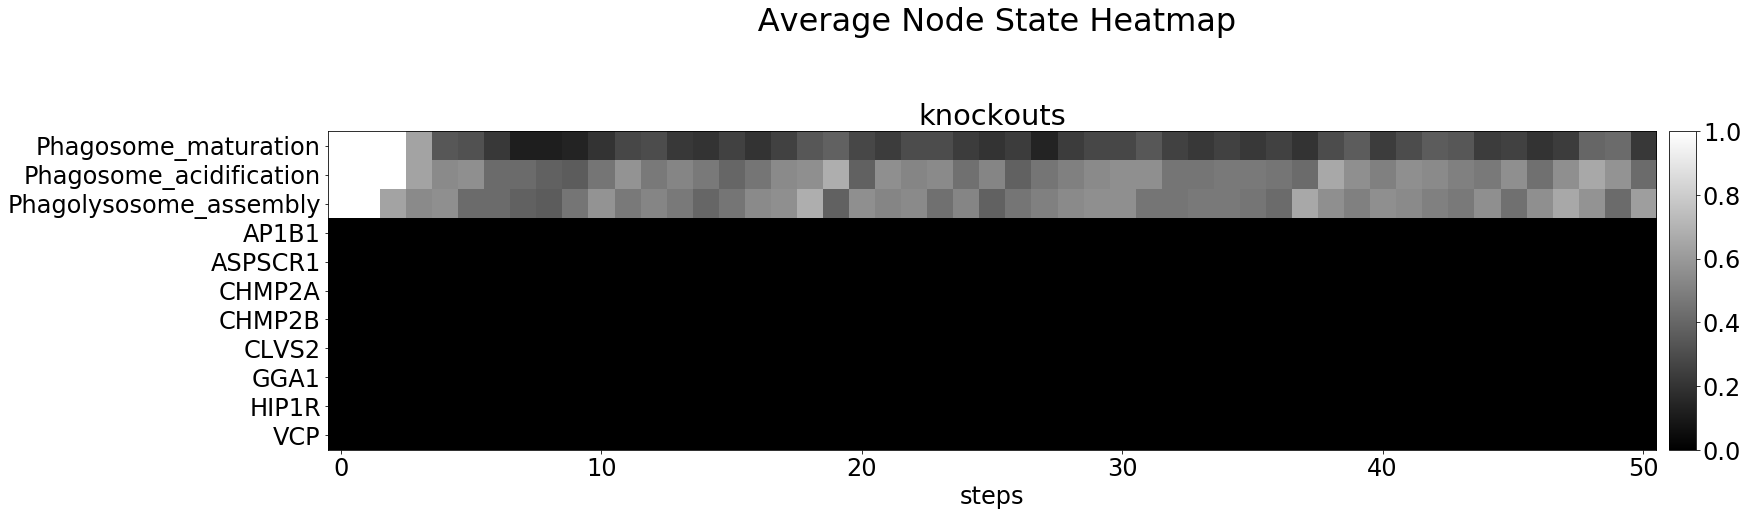

In [15]:
print "FIG 5"
avg_knockouts = bm.average_models(models_knockouts)
bm.plot_maps([avg_knockouts],
             titles=['knockouts'], 
             nodes = processes + sorted(hit),
             h = 7.5,
             w = 25,
             top = 0.75,
             bottom=0.16,
             left=.19,
             right = .95,
             fontsize = 24,
             suptitlesize = 32,
             suptitle=' '*22+'Average Node State Heatmap' # white space to centre
            )

In [16]:
# analyse behaviour
cycles = bm.get_cycles(models_knockouts)
print bm.count_cycles(cycles)
print bm.average_cycles(cycles)

('none: 0', 'steady: 50', 'other: 0')
[4.5 1. ]


In [17]:
# look at 'other' states

# bm.print_cycles(cycles)
# models[2].report_cycles()

knockouts one by one

In [18]:
avgs_knockoutsOneByOne = []
for factor in hit:
    definition_loop = bm.knockout(definition, [factor])
    models = bm.run_model(definition_loop, steps=50, runs=runs)
    avgs_knockoutsOneByOne.append(bm.average_models(models))

FIG 9


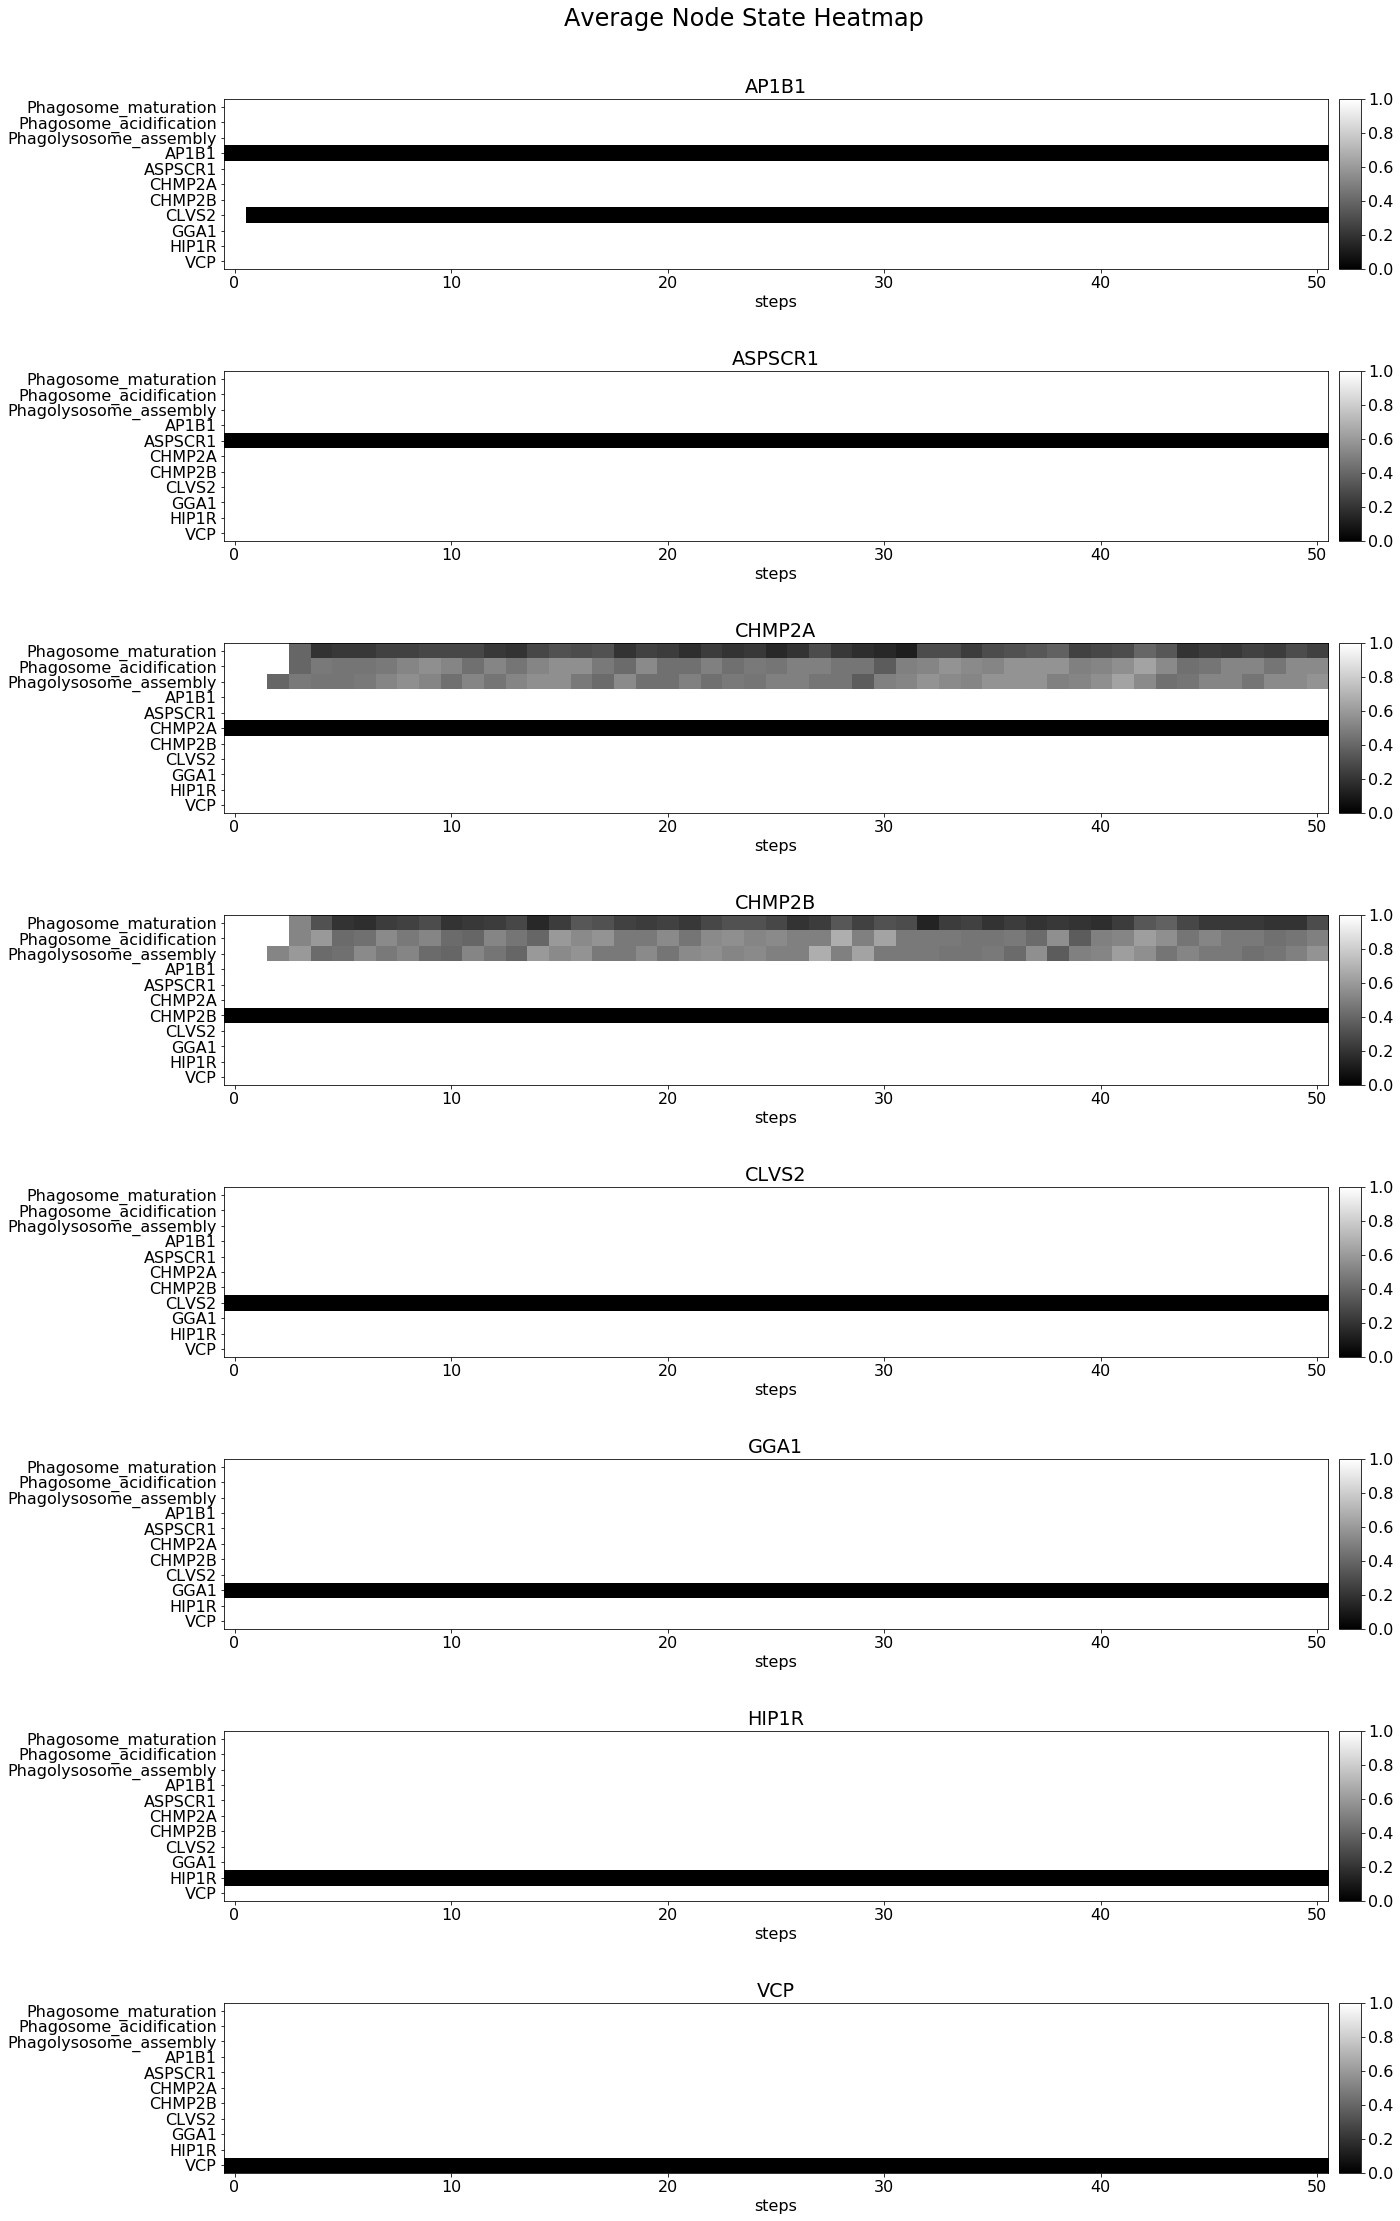

In [19]:
print "FIG 9"
bm.plot_maps(avgs_knockoutsOneByOne,
             titles=hit, 
             nodes = processes + hit,
             h = 4,
             top = 0.94,
             bottom=0.04,
             left=.16,
             right=.95,
             suptitle='        Average Node State Heatmap', # white space to centre
             hspace = 0.6
            )

knockouts AND mtb ON

In [20]:
definition_mtbANDknockouts = add_mtb2definition(definition_knockouts, 'mtb-edgelist.csv', True) 
# print definition_mtbANDknockouts


added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


In [21]:
# runs
models_mtbANDknockouts = bm.run_model(definition_mtbANDknockouts, steps=50, runs=runs)

FIG 6


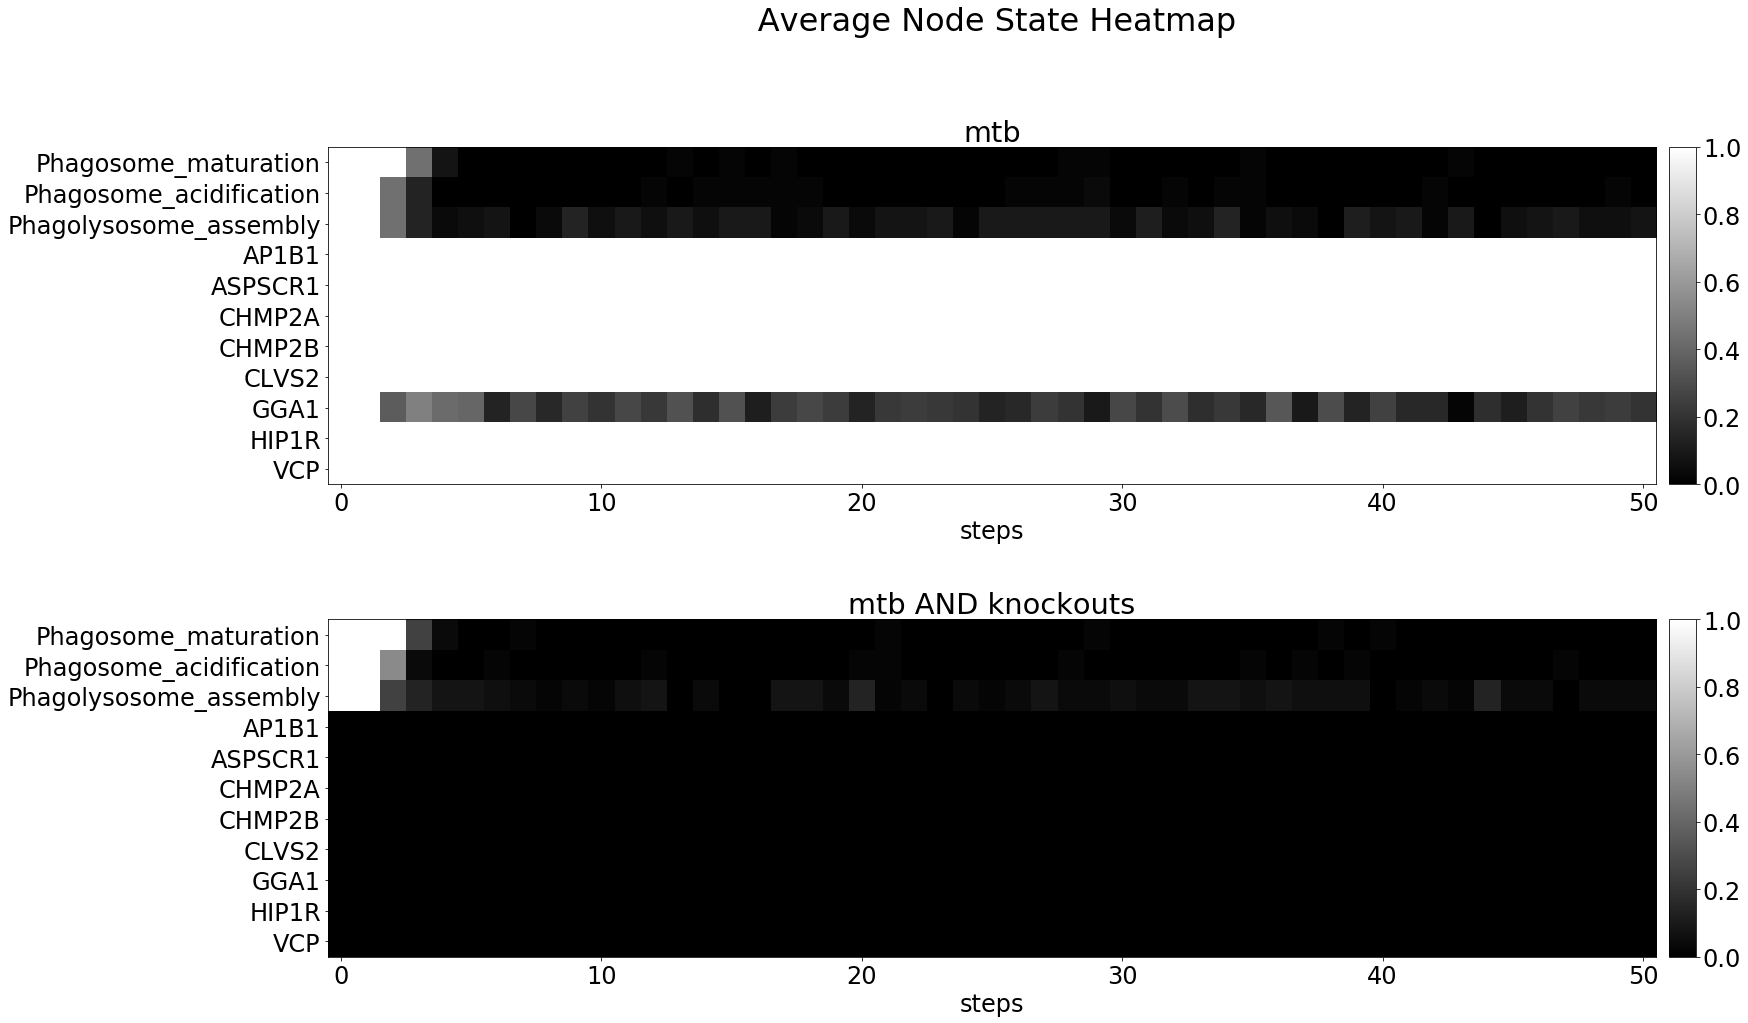

In [22]:
print "FIG 6"
avg_mtbANDknockouts = bm.average_models(models_mtbANDknockouts)
bm.plot_maps([avg_mtb, avg_mtbANDknockouts],
             titles=['mtb','mtb AND knockouts'], 
             nodes = processes + sorted(hit),
             hspace=0.4,
             top = 0.85,
             h = 7.5,
             w = 25,
             bottom=0.1,
             left=.19,
             right = .95,
             fontsize = 24,
             suptitlesize = 32,
             suptitle=' '*22+'Average Node State Heatmap' # white space to centre
            )

In [23]:
# analyse behaviour
cycles = bm.get_cycles(models_mtbANDknockouts)
print bm.count_cycles(cycles)
print bm.average_cycles(cycles)
# bm.print_cycles(cycles)

('none: 34', 'steady: 16', 'other: 0')
[7.06 0.32]


knockouts one by one AND mtb ON 

In [24]:
selection = ['CHMP2A','CHMP2B']
selection = sorted(selection)
avgs_mtbANDknockoutsOneByOne = []
for factor in selection: #hit:
    definition_loop = bm.knockout(definition_mtbON, [factor])
    models = bm.run_model(definition_loop, steps=50, runs =runs)
    avg = bm.average_models(models)
    avgs_mtbANDknockoutsOneByOne.append(avg)

FIG 7


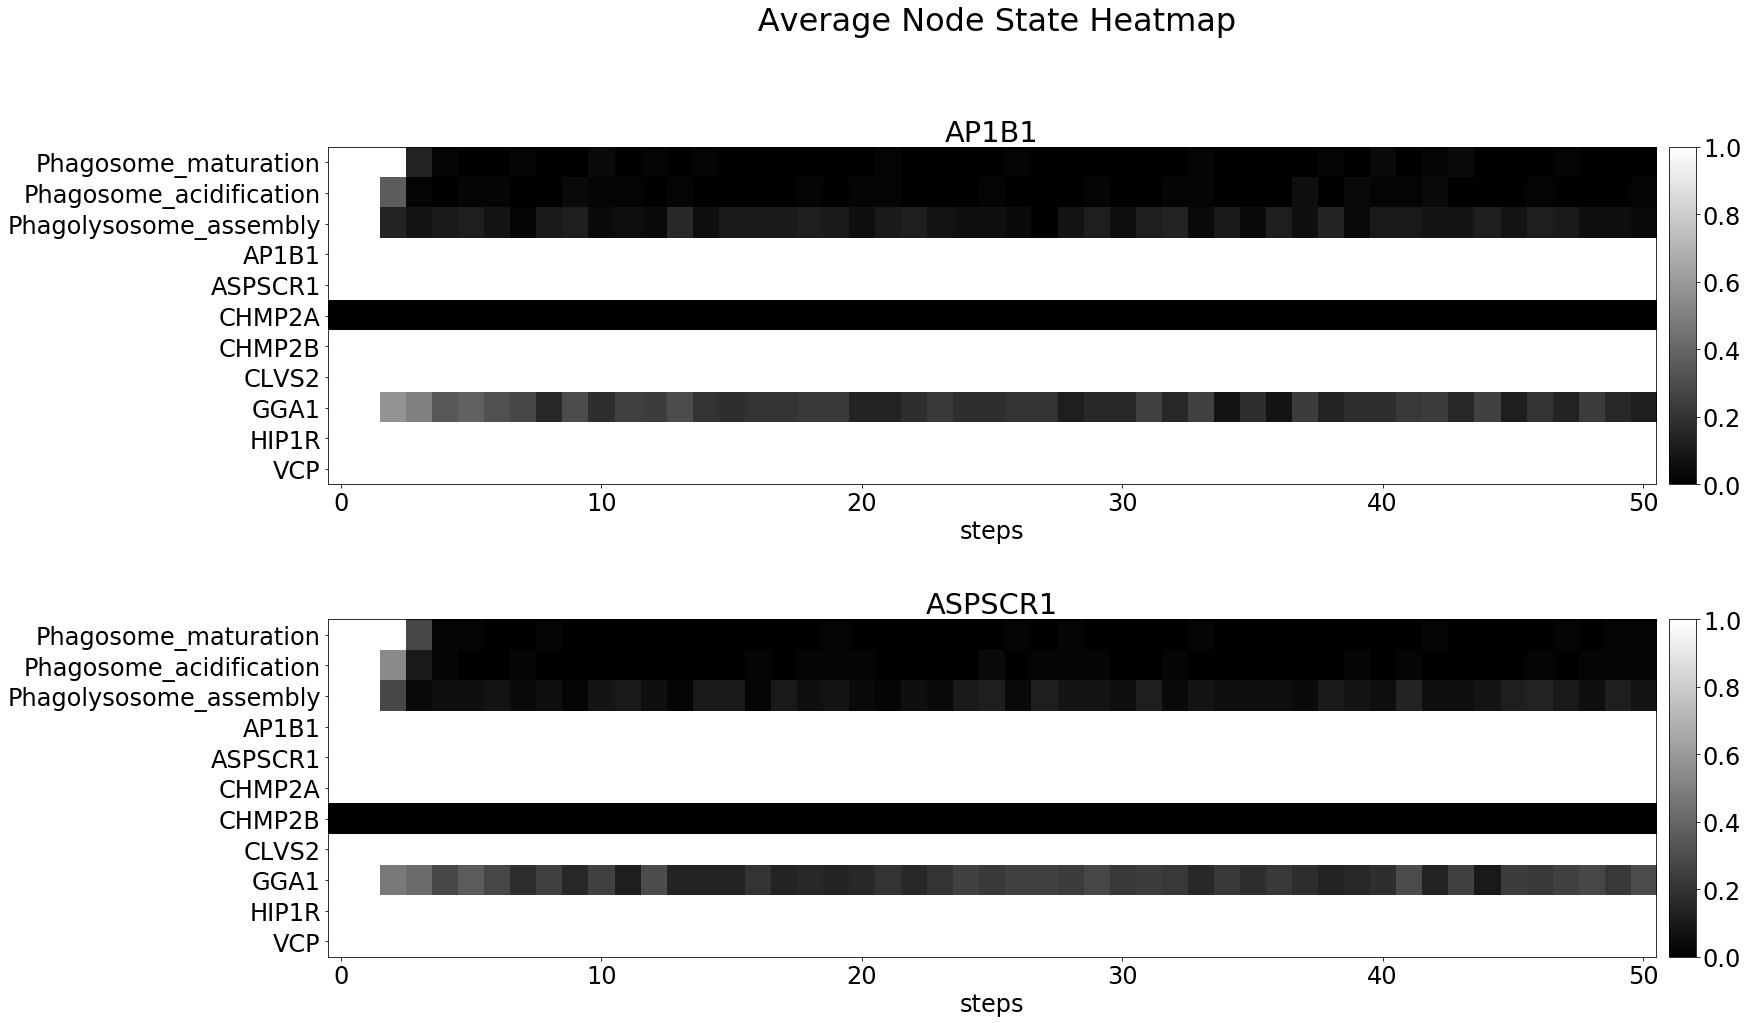

In [25]:
print "FIG 7"
bm.plot_maps(avgs_mtbANDknockoutsOneByOne,
             titles=hit, 
             nodes = processes + hit,
             hspace=0.4,
             top = 0.85,
             h = 7.5,
             w = 25,
             bottom=0.1,
             left=.19,
             right = .95,
             fontsize = 24,
             suptitlesize = 32,
             suptitle=' '*22+'Average Node State Heatmap' # white space to centre
            )

knockouts AND mtb ON one by one 

In [26]:
definition_mtbOffANDknockouts = add_mtb2definition(definition_knockouts, 'mtb-edgelist.csv', False)

added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


In [27]:
avgs_mtbOneByOneANDknockouts = []
for factor in mtb:
    definition_loop = bm.switch(definition_mtbOffANDknockouts, on=[factor])
    models = bm.run_model(definition_loop, steps=50, runs=runs)
    avg = bm.average_models(models)
    avgs_mtbOneByOneANDknockouts.append(avg)

FIG 8


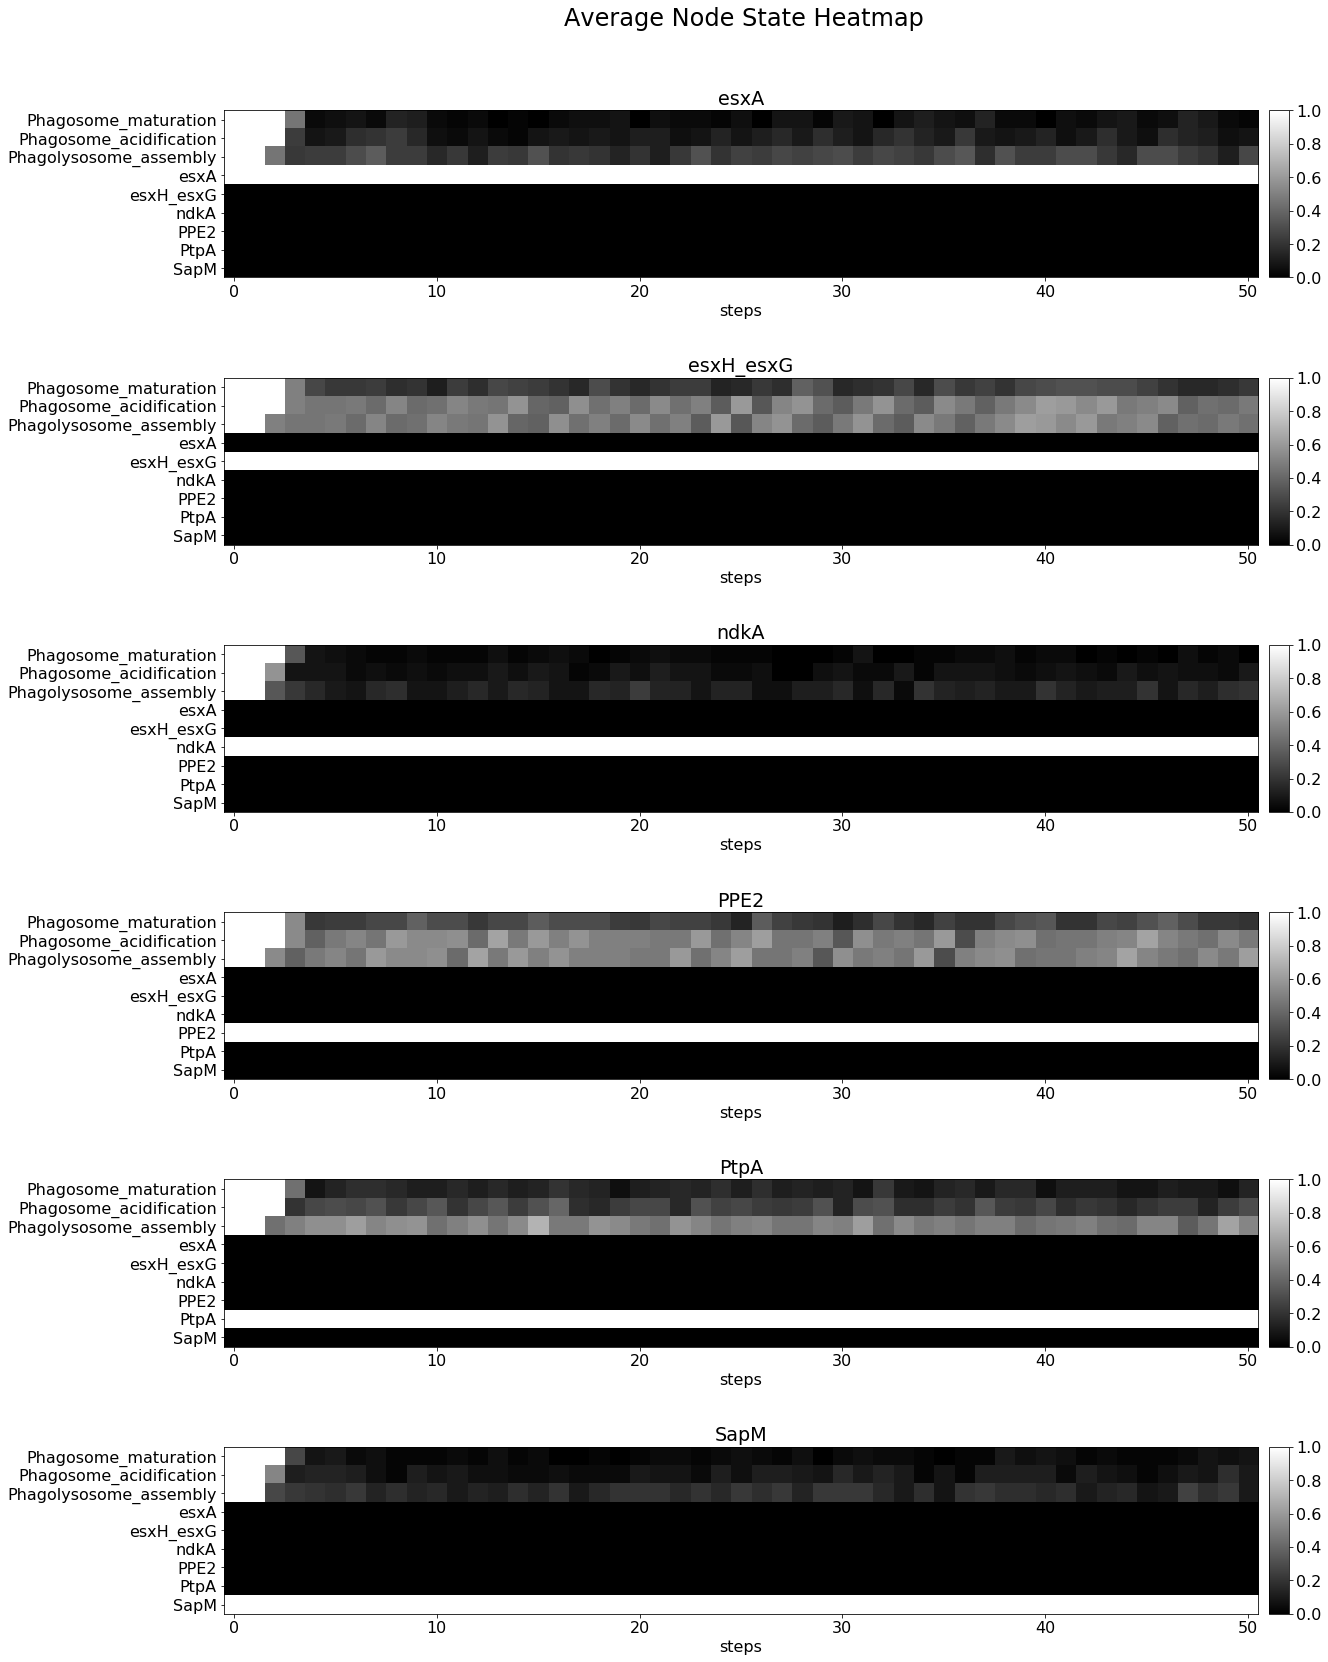

In [28]:
print "FIG 8"
bm.plot_maps(avgs_mtbOneByOneANDknockouts,
             titles=mtb, 
             nodes = processes + mtb,
             h = 4,
             top = 0.92,
             bottom=0.05,
             left=.16,
             suptitle='        Average Node State Heatmap', # white space to centre
             hspace = 0.6
            )

In [29]:
hit

['AP1B1', 'ASPSCR1', 'CHMP2A', 'CHMP2B', 'CLVS2', 'GGA1', 'HIP1R', 'VCP']